In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

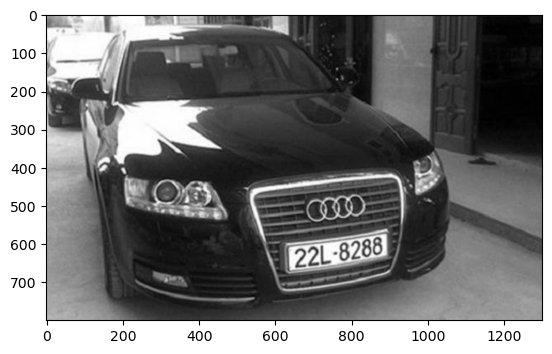

In [9]:
img = cv2.imread('bienso2.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))

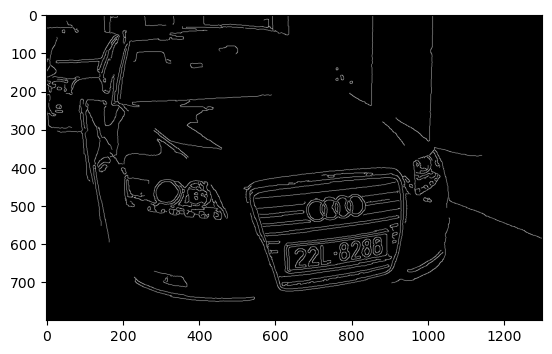

In [10]:
img_filter = cv2.bilateralFilter(img_gray, 11, 17, 17)
img_edged = cv2.Canny(img_filter, 30, 200)
plt.imshow(cv2.cvtColor(img_edged, cv2.COLOR_BGR2RGB))

In [11]:
keypoints = cv2.findContours(img_edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [12]:
location = None
for i in contours:
    x = cv2.approxPolyDP(i, 10, True)
    if len(x) == 4:
        location = x
        break
location

array([[[893, 576]],

       [[638, 609]],

       [[637, 666]],

       [[890, 631]]], dtype=int32)

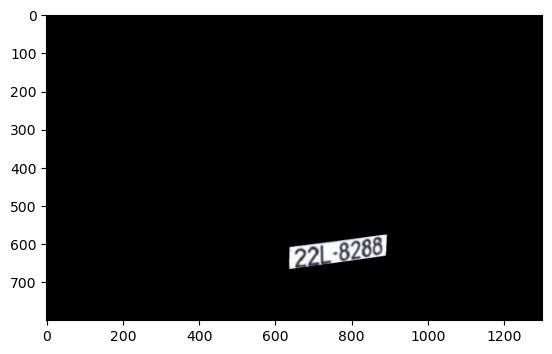

In [13]:
mask = np.zeros(img_gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

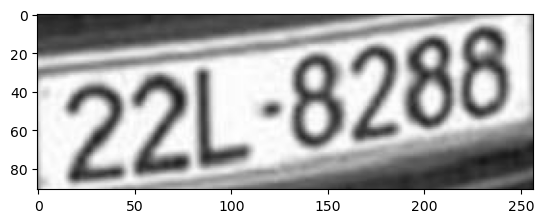

In [14]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img_gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))